# K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 计算距离欧式距离

In [2]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))
    

## K-Means算法实现

In [3]:
def KMeans(data, k,accuracy=0.1):
    ##样本数量
    n = data.shape[0]
    
    ##样本聚类结果集
    cluster_result=np.zeros((n,2))

    ##随机生成初始质心
    t =[k]
    for i in data.shape[1:]:
        t.append(i)
    centroid  = np.zeros(t)
    for i in range(k):
        centroid[i] = data[np.random.randint(0, n)]
   
    ##改变种类的样本的个数
    change = n
    ##最大循环数
    count = 0
    ##寻找  
    while change>n*accuracy and count<1000:
        change=0
        for i in range(n):
            min_dis=np.inf
            min_j = -1
            ##计算最近质心的距离
            for j in range(k):
                dis = distance(centroid[j],data[i])
                if(dis<min_dis):
                    min_dis = dis
                    min_j = j
                    
             ##计算变化的个数
            if cluster_result[i,0] !=min_j:
                change=change+1
            
            cluster_result[i,0] = min_j
            cluster_result[i,1] = min_dis**2
        ##重新生成质心
        for m in range(k):
            ptsInClust = data[cluster_result[:,0]==m]
            centroid[m]=np.mean(ptsInClust,axis=0)
        count=count+1
                
    return centroid,cluster_result

## 生成测试数据

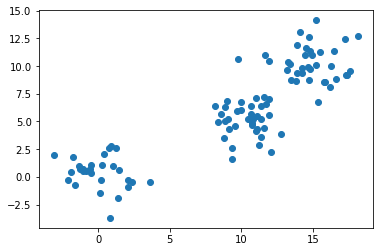

In [7]:
# data = np.arange(100).reshape(4,-1)
# KMeans(data,1)

data = np.empty((100,2))
# data[:,0] = np.random.uniform(0,100,size=100)
# data[:,1] = 0.75*data[:,0] + 3 + np.random.normal(0,10,size=100)
noise = 1.5
for i in range(100) :
    t = np.random.randint(0,3)
    if t==0:
        data[i,0]=np.random.normal(0,noise)
        data[i,1]= np.random.normal(0,noise)
    if t==1:
        data[i,0]=10+np.random.normal(0,noise)
        data[i,1]= 5+np.random.normal(0,noise)
    if t==2:
        data[i,0]=15+np.random.normal(0,noise)
        data[i,1]= 10+np.random.normal(0,noise)

plt.scatter(data[:,0],data[:,1])

## 测试算法效果

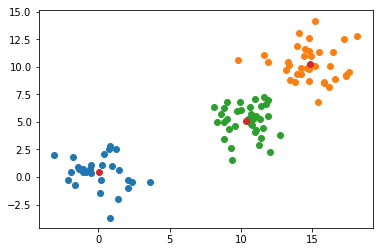

In [8]:
k=3

y =KMeans(data, k)
centroid=y[0]
cluster_result=y[1]

for i in range(k):
    plt.scatter(data[cluster_result[:,0]==i,0],data[cluster_result[:,0]==i,1])
    
plt.scatter(centroid[:,0],centroid[:,1])
plt.show()